In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("user_behavior_dataset.csv")

In [17]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [21]:
df.duplicated().sum()

0

In [23]:
numeric_df = df.select_dtypes(include='number')

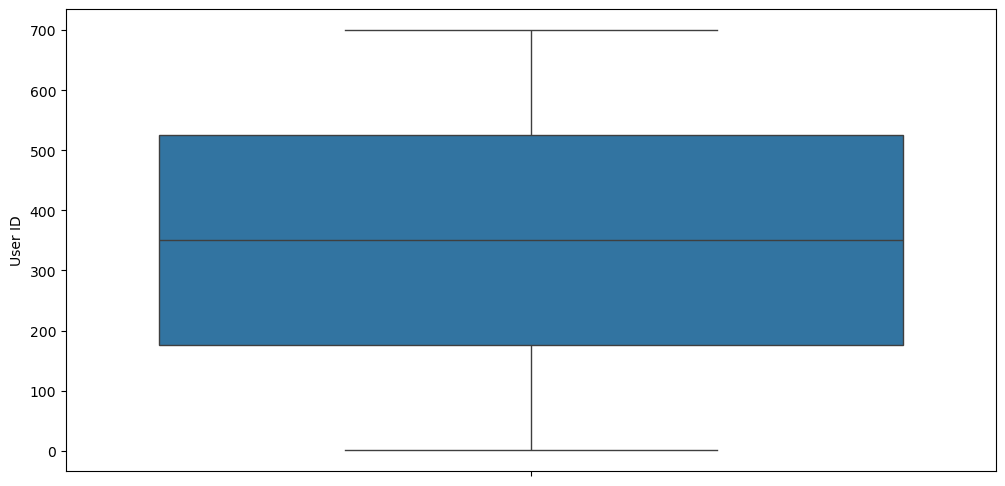

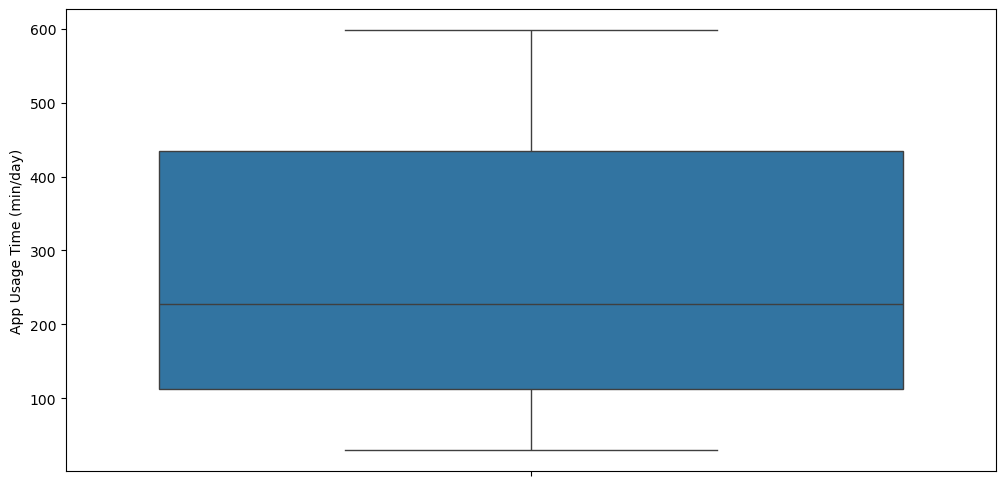

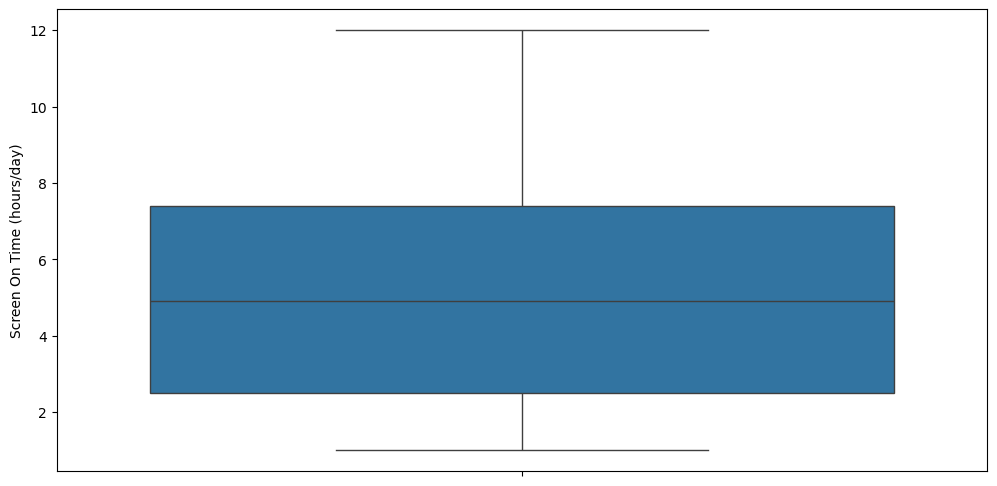

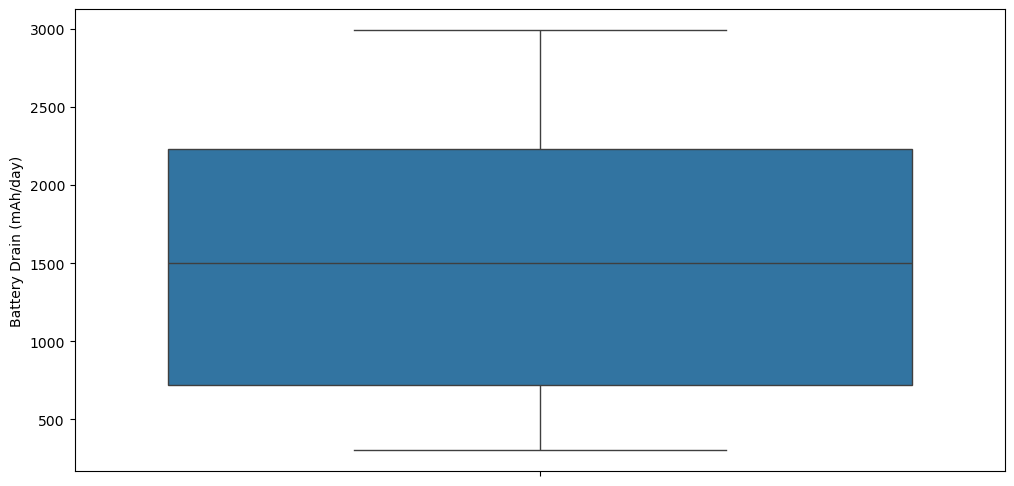

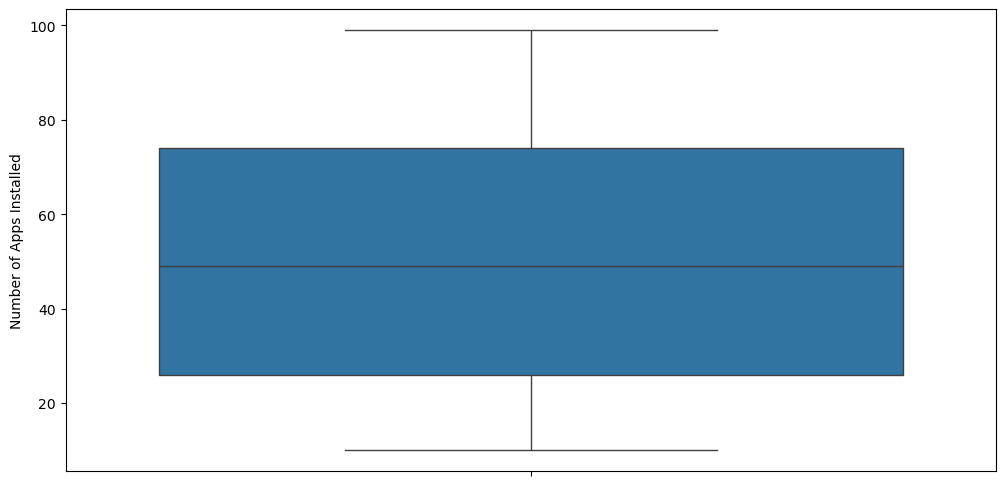

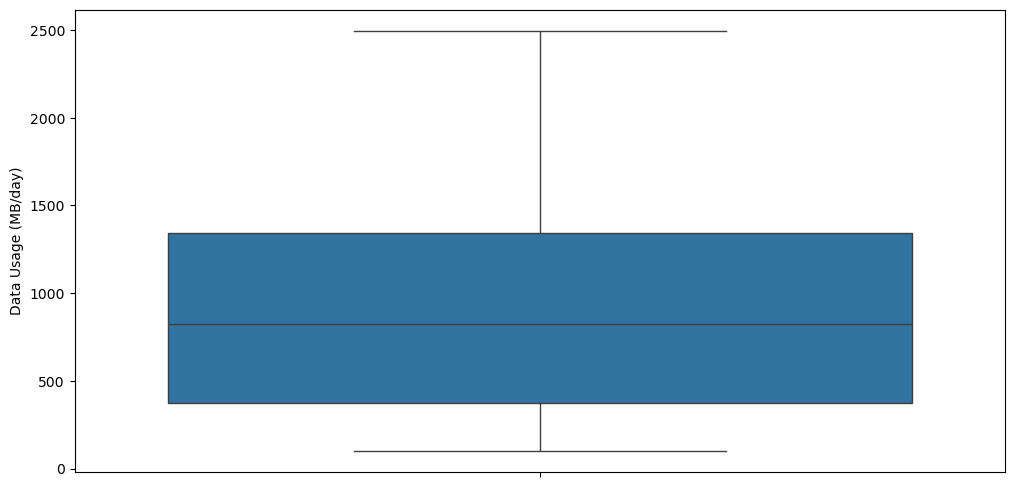

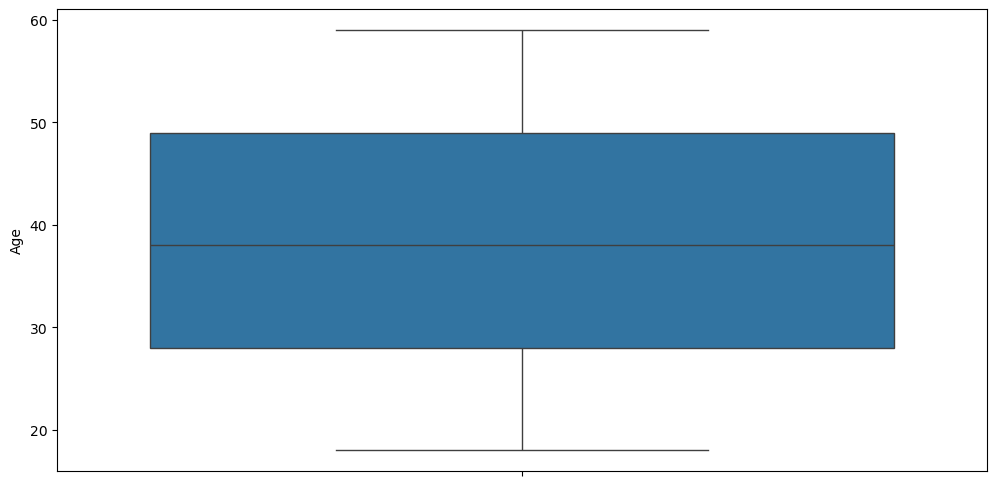

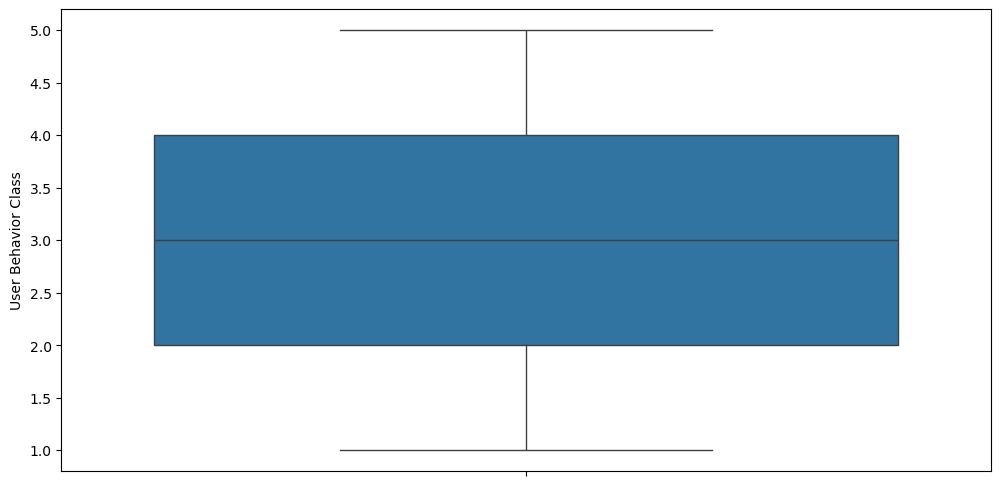

In [25]:
for columns in numeric_df:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=columns,data=numeric_df)
    plt.show()

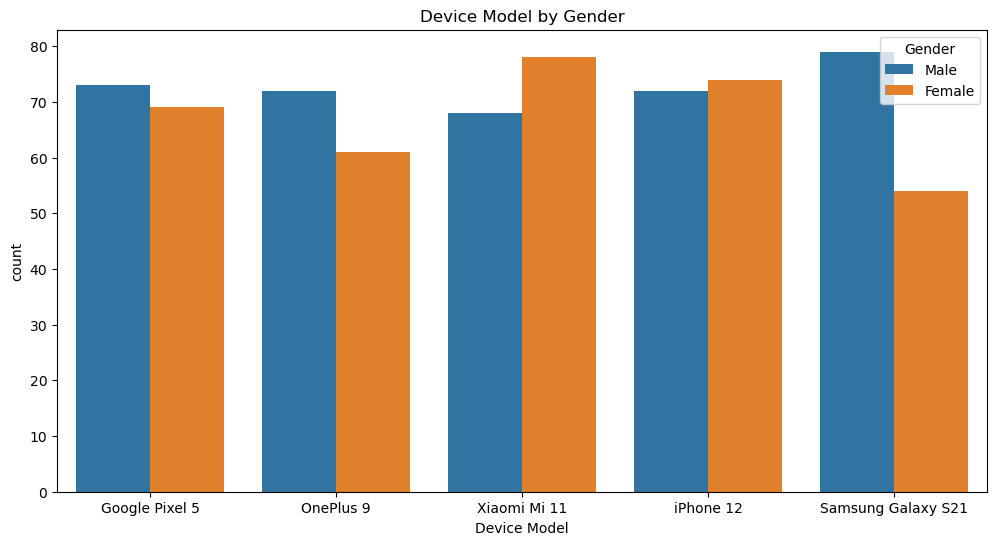

In [29]:
#Device Model vs. Gender
plt.figure(figsize=(12,6))
sns.countplot(hue='Gender',x='Device Model',data=df)
plt.title('Device Model by Gender')
plt.show()

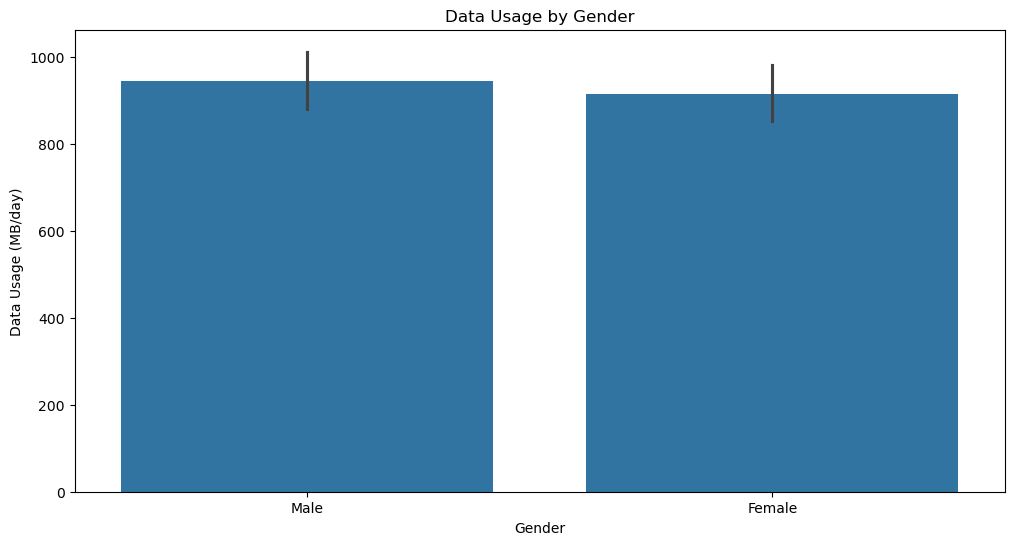

In [33]:
# Data Usage vs. Gender
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Data Usage (MB/day)',data=df)
plt.title('Data Usage by Gender')
plt.show()

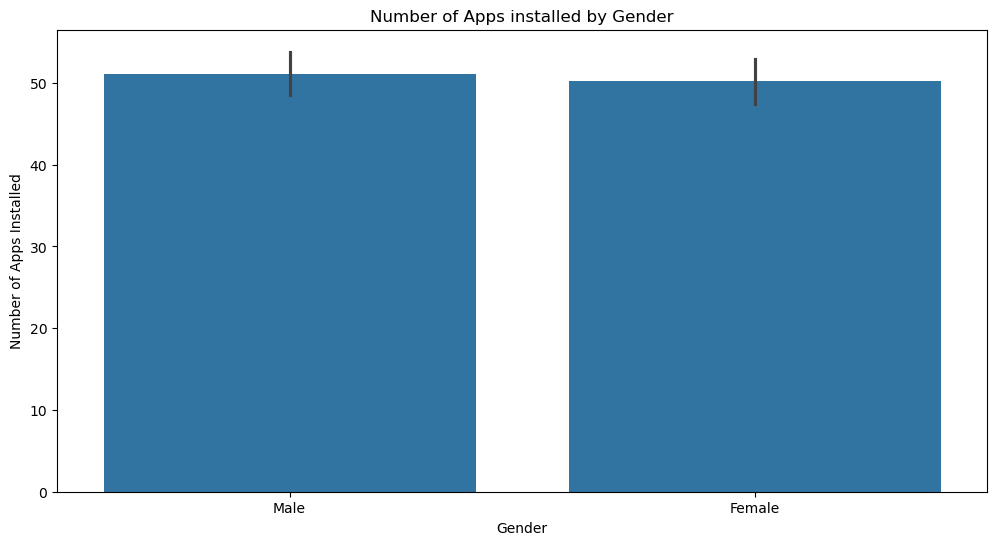

In [35]:
# Number of Apps installed Vs. Gender¶
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Number of Apps Installed',data=df)
plt.title('Number of Apps installed by Gender')
plt.show()

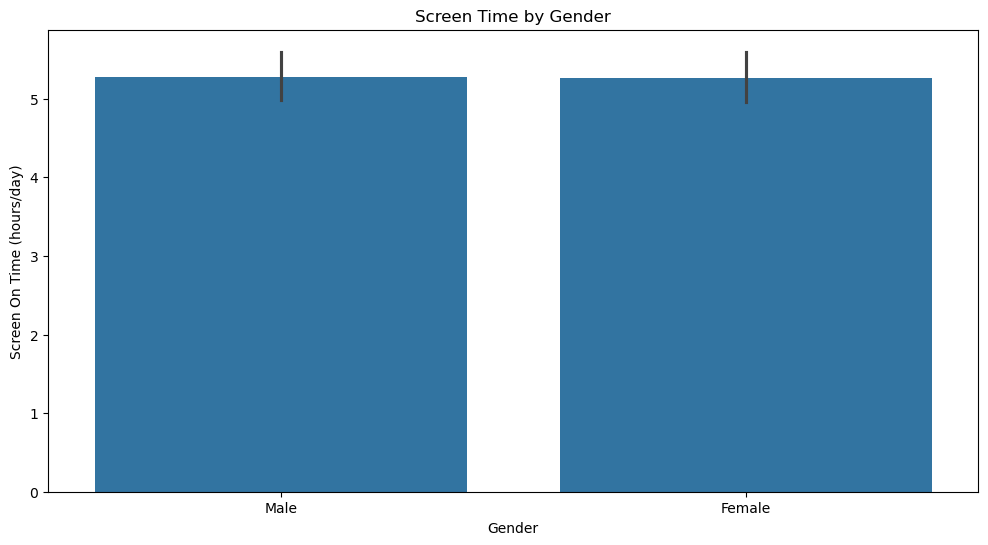

In [37]:
# Screen On Time (hours/day) Vs. Gender¶
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Screen On Time (hours/day)',data=df)
plt.title('Screen Time by Gender')
plt.show()


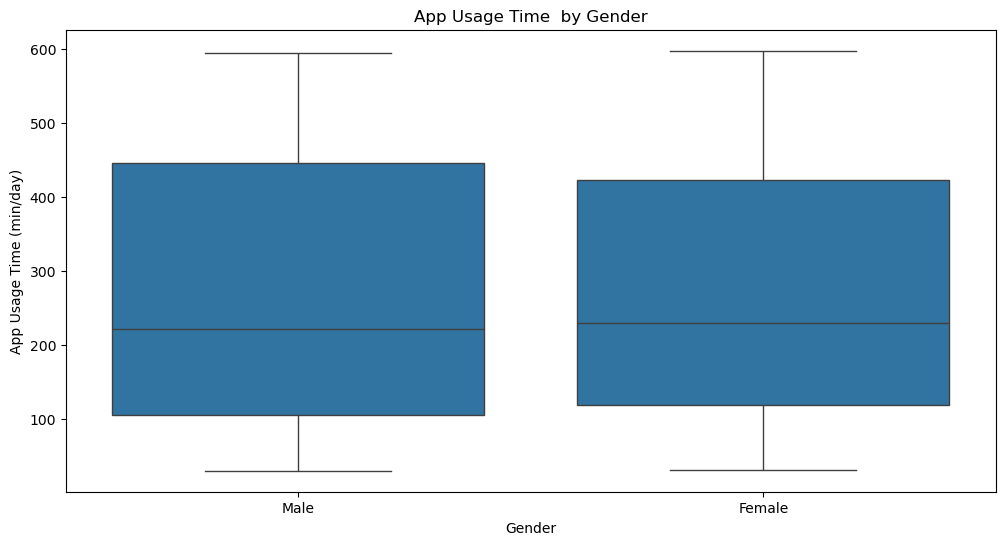

In [39]:
# App Usage Time (min/day) Vs. Gender¶
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='App Usage Time (min/day)',data=df)
plt.title('App Usage Time  by Gender')
plt.show()

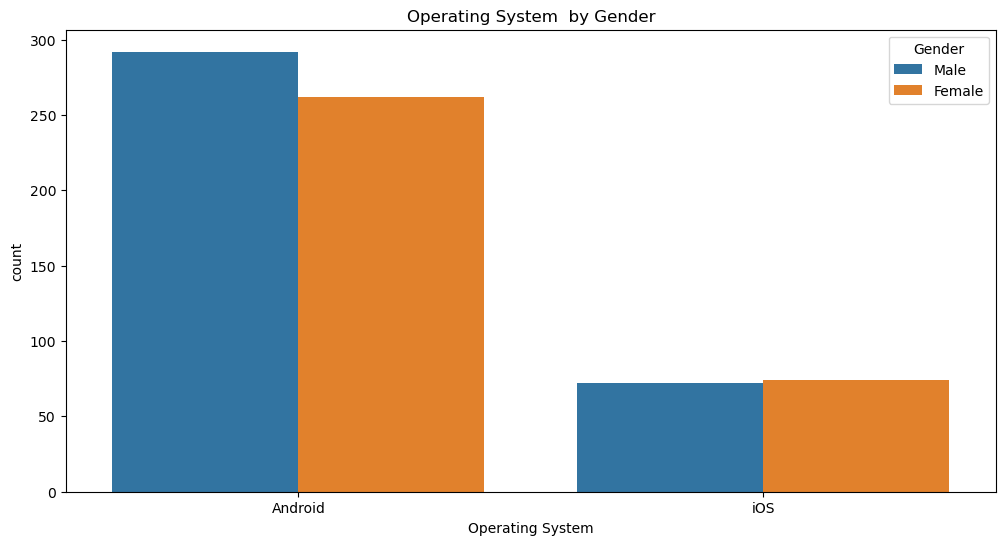

In [41]:
# Operating System Vs. Gender¶
plt.figure(figsize=(12,6))
sns.countplot(hue='Gender',x='Operating System',data=df)
plt.title('Operating System  by Gender')
plt.show()

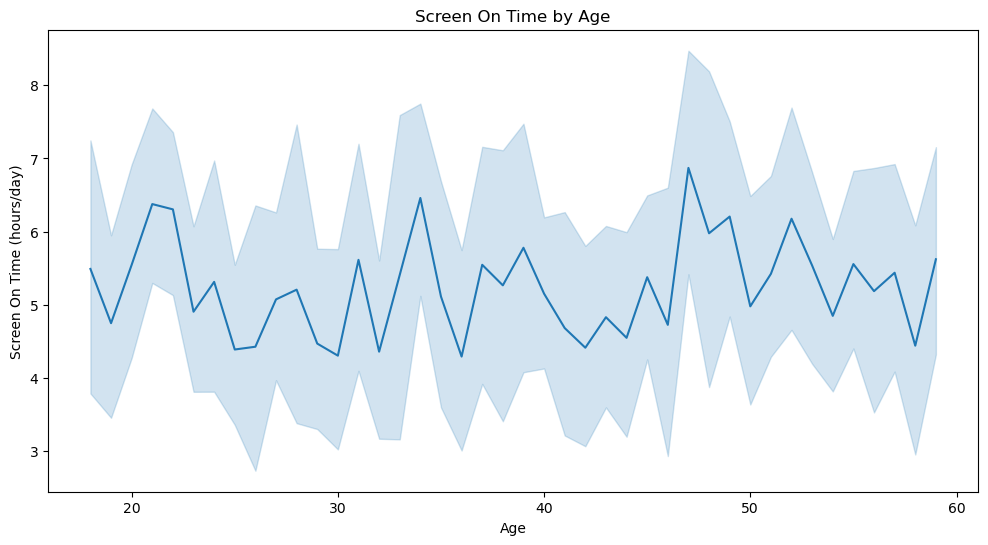

In [43]:
# Screen On Time Vs. Age¶
plt.figure(figsize=(12,6))
sns.lineplot(x='Age',y='Screen On Time (hours/day)',data=df)
plt.title('Screen On Time by Age')
plt.show()

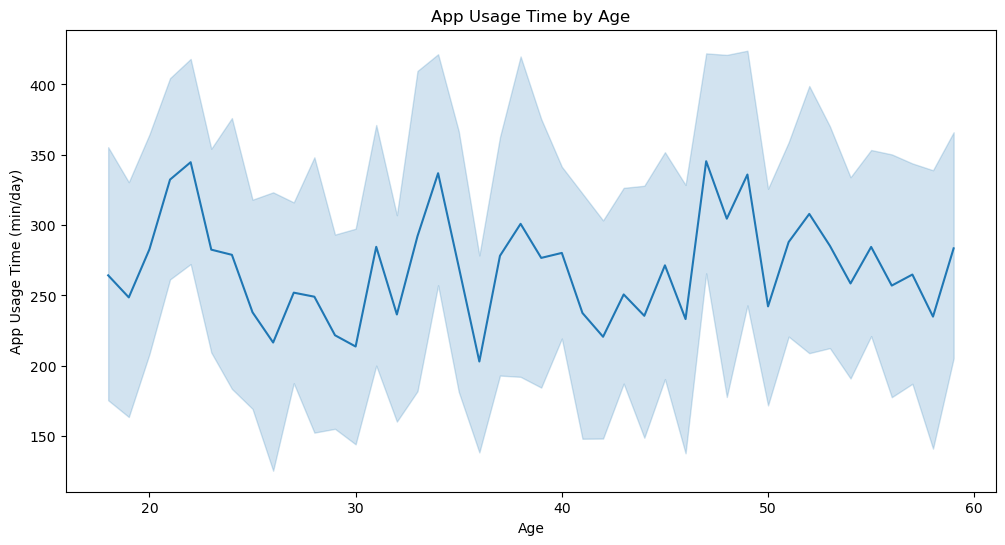

In [45]:
# App Usage Time Vs. Age¶
plt.figure(figsize=(12,6))
sns.lineplot(x='Age',y='App Usage Time (min/day)',data=df)
plt.title('App Usage Time by Age')
plt.show()

In [47]:
df = df.drop(columns = ["User ID"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [51]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [53]:
changes = {
    'Xiaomi Mi 11' : 0,
    'iPhone 12' : 1,
    'Google Pixel 5' : 2,
    'OnePlus 9' : 3,
    'Samsung Galaxy S21' : 4
}

In [56]:
df['Device Model'] = df['Device Model'].map(changes)

In [58]:
df['Operating System'].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

In [60]:
changes = {
    'Android' : 0,
    'iOS' : 1
}

In [62]:
df['Operating System'] = df['Operating System'].map(changes)

In [64]:
df['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

In [67]:
changes = {
    'Male' : 0,
    'Female' : 1
}

In [69]:
df['Gender'] = df['Gender'].map(changes)

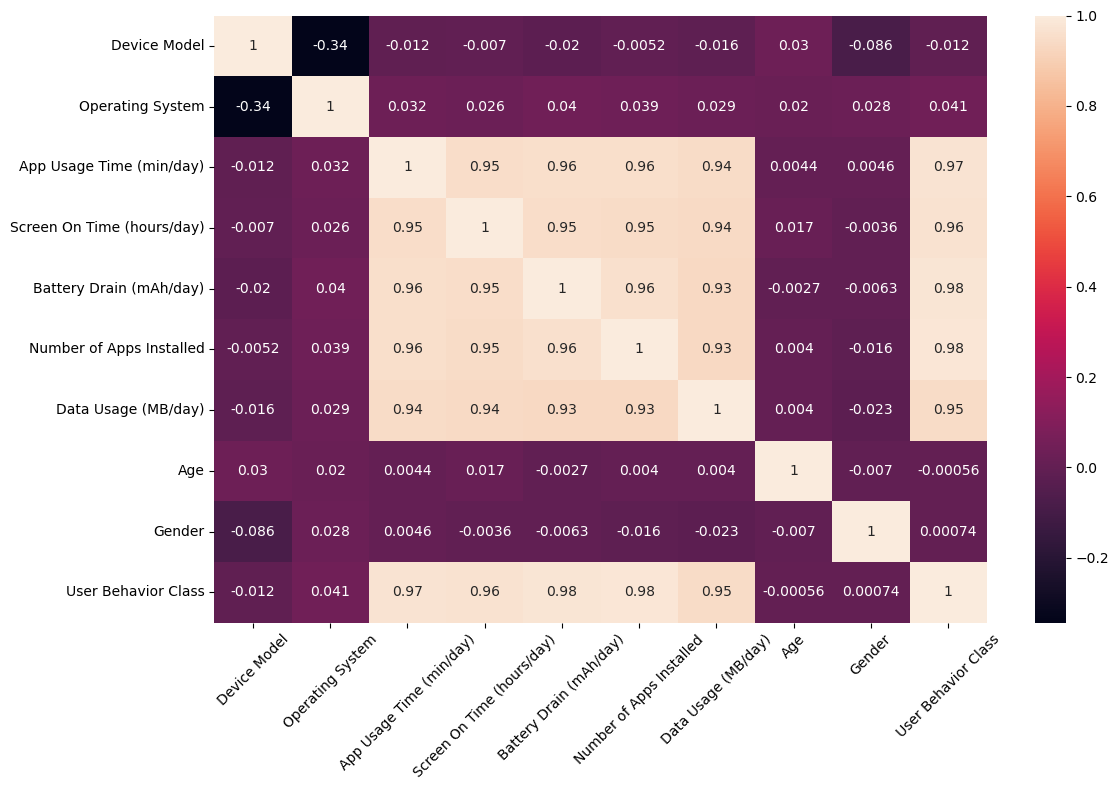

In [71]:
# Correlation¶
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(),  annot=True)
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 
plt.tight_layout()

In [73]:
# Linear Regression¶
Y = df['User Behavior Class']
X = df.drop(columns = 'User Behavior Class',axis=1)

In [75]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1,1))

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle = True, random_state=42)

In [79]:
model = LinearRegression()

In [81]:
model.fit(X_train, Y_train)

LinearRegression()

In [83]:
model.score(X_train, Y_train)

0.9842456139062721

In [85]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,Y_test)
print(f'R² Score: {r2 * 100:.2f}%')

R² Score: 98.64%
